https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('../Data/monthly_data_total.xlsx')

In [5]:
test_size = 13

In [6]:
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Import  169 non-null    float64       
 2   Export  169 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.0 KB


In [8]:
df.index = df.Date

In [9]:
df.head()

,Date,Import,Export
Date,,,
2006-01-01,2006-01-01,12519.71,9143.66
2006-02-01,2006-02-01,11479.69,8993.29
2006-03-01,2006-03-01,14314.02,11560.97
2006-04-01,2006-04-01,12924.18,8624.66
2006-05-01,2006-05-01,15105.67,10109.30


In [10]:
df = df[['Import', 'Export']]

In [11]:
df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


In [12]:
df.shape

(169, 2)

In [13]:
df = df.resample('M').sum()

In [14]:
df.shape

(169, 2)

Text(0, 0.5, 'Values in million US $')

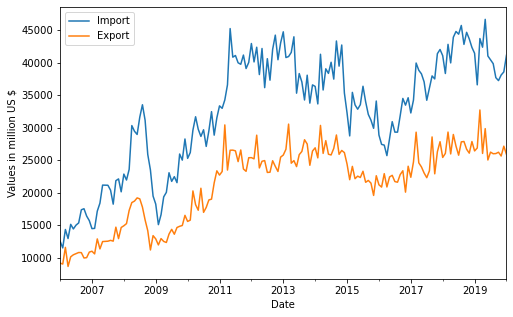

In [15]:
df.plot(figsize = (8,5))
plt.ylabel('Values in million US $')

In [16]:
df_train = df[:-test_size]

In [17]:
import statsmodels.api as sm

model_import = sm.tsa.statespace.SARIMAX(df_train['Import'], order=(1, 0, 0),seasonal_order=(0,1,1,12), trend='n').fit()
yhat_import = model_import.forecast(test_size)
model_export = sm.tsa.statespace.SARIMAX(df_train['Export'], order=(1, 0, 2),seasonal_order=(0,1,1,12), trend='n').fit()
yhat_export = model_export.forecast(test_size)



In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


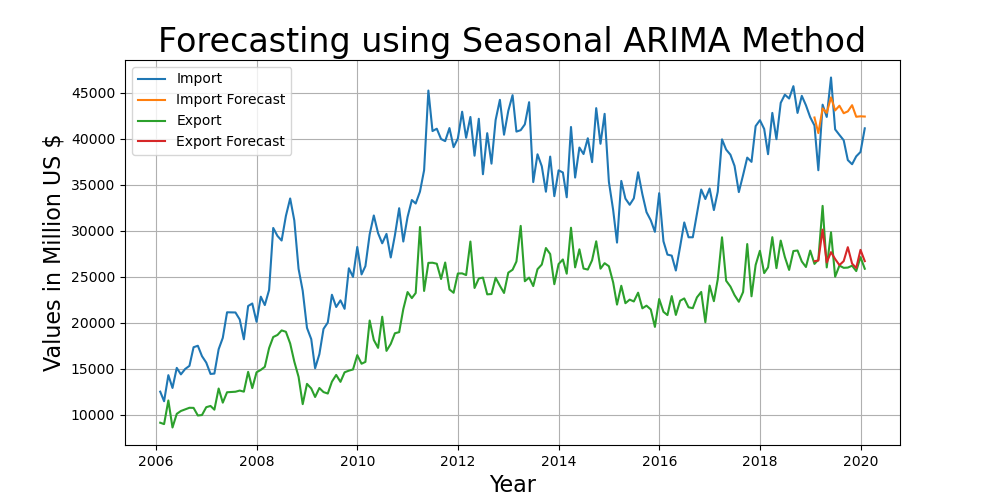

In [19]:
plt.figure(figsize=(10,5))
plt.plot( df['Import'], label='Import')
plt.plot( yhat_import, label='Import Forecast')
plt.plot( df['Export'], label='Export')
plt.plot( yhat_export, label='Export Forecast')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Values in Million US $', fontsize = 16)
plt.title('Forecasting using Seasonal ARIMA Method', fontsize = 24)
plt.grid()
plt.legend()
plt.show()

In [20]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

In [21]:
rmse(df['Import'][-test_size:], yhat_import[:test_size]).round(2), rmse(df['Export'][-test_size:],  yhat_export[:test_size]).round(2)

(3391.32, 1310.58)

## To Find Order

In [22]:
# for p in range(3):
#     for d in range(2):
#         for q in range(7):
#             try:
#                 model_import = sm.tsa.statespace.SARIMAX(df_train['Import'], order=(p, d, q),seasonal_order=(0,1,1,12), trend='n').fit()
#                 yhat_import = model_import.forecast(24)
# #                 model_export = sm.tsa.statespace.SARIMAX(df_train['Export'], order=(p, d, q),seasonal_order=(0,1,1,12), trend='n').fit()
# #                 yhat_export = model_export.forecast(24)
#                 print(p,d,q, rmse(df['Import'][-12:], yhat_import[:12]))
#             except:
#                 pass

In [23]:
# for p in range(3):
#     for d in range(2):
#         for q in range(7):
#             try:
# #                 model_import = sm.tsa.statespace.SARIMAX(df_train['Import'], order=(p, d, q),seasonal_order=(0,1,1,12), trend='n').fit()
# #                 yhat_import = model_import.forecast(24)
#                 model_export = sm.tsa.statespace.SARIMAX(df_train['Export'], order=(p, d, q),seasonal_order=(0,1,1,12), trend='n').fit()
#                 yhat_export = model_export.forecast(24)
#                 print(p,d,q, rmse(df['Export'][-12:],  yhat_export[:12]))
#             except:
#                 print('pass')
#                 pass

In [24]:
model_import.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Import   No. Observations:                  156
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1361.405
Date:                              Sun, 07 Jun 2020   AIC                           2728.810
Time:                                      19:38:49   BIC                           2737.719
Sample:                                  01-31-2006   HQIC                          2732.430
                                       - 12-31-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.012     80.172      0.000       0.975       1.023
ma.S.L12      -0.9851      0.125     -7.889      0.000      -1.230      -0.740
sigma2      8.191e+06    1.7e-08   4.83e+14      0.000    8.19e+06    8.19e+06
===================================================================================
Ljung-Box (Q):                       38.45   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.54   Prob(JB):                         0.48
Heteroskedasticity (H):               0.85   Skew:                            -0.18
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.23e+29. Standard errors may be unstable.
"""

In [25]:
model_export.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Export   No. Observations:                  156
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -1274.392
Date:                              Sun, 07 Jun 2020   AIC                           2558.785
Time:                                      19:38:49   BIC                           2573.634
Sample:                                  01-31-2006   HQIC                          2564.818
                                       - 12-31-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9785      0.015     65.298      0.000       0.949       1.008
ma.L1         -0.3435      0.073     -4.706      0.000      -0.487      -0.200
ma.L2          0.0965      0.084      1.145      0.252      -0.069       0.261
ma.S.L12      -0.7641      0.090     -8.491      0.000      -0.940      -0.588
sigma2      2.659e+06   2.84e+05      9.350      0.000     2.1e+06    3.22e+06
===================================================================================
Ljung-Box (Q):                       28.51   Jarque-Bera (JB):                 2.11
Prob(Q):                              0.91   Prob(JB):                         0.35
Heteroskedasticity (H):               0.88   Skew:                             0.06
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""